In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [ ]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%***********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   54.968887  51970000
2020-04-02   55.000000   56.138500  ...   55.713547  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.640800  33086200
2023-03-31  101.300003  103.889999  ...  103.473785  36863400

[756 rows x 6 columns]


In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(605, 1) (151, 1)


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(605, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()


[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (555, 50, 1) y_train : (555, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (101, 50, 1) y_test : (101, 1)


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0224
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0037
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0029
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0031
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0024
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0025
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0022
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0019
Epoch 9/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0019
Epoch 10/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0020
Epoch 11/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0021
Epoch 12/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0018
Epoch 13/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0018
Epoch 14/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0016
Epoch 15/20
278/278 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
                  y_train,
                  batch_size = 1,
                  epochs = 12)
regressorLSTM.summary()


Epoch 1/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0037 - loss: 0.0230
Epoch 2/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0011 - loss: 0.0025
Epoch 3/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0013 - loss: 0.0022
Epoch 4/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0028 - loss: 0.0017
Epoch 5/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 8.2637e-04 - loss: 0.0018
Epoch 6/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0040 - loss: 0.0013
Epoch 7/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0038 - loss: 0.0011
Epoch 8/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0035 - loss: 9.7978e-04
Epoch 9/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0038 - loss: 0.0012
Epoch 10/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0049 - loss: 0.0016
Epoch 11/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0020 - loss: 0.0011
Epoch 12/12
555/555 ━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   decay=1e-7,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0218
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.0043
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0034
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0026
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0027
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0023
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0024
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0026
Epoch 9/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 0.0025
Epoch 10/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0022
Epoch 11/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0022
Epoch 12/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0021
Epoch 13/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - loss: 0.0022
Epoch 14/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.0020
Epoch 15/20
555/555 ━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

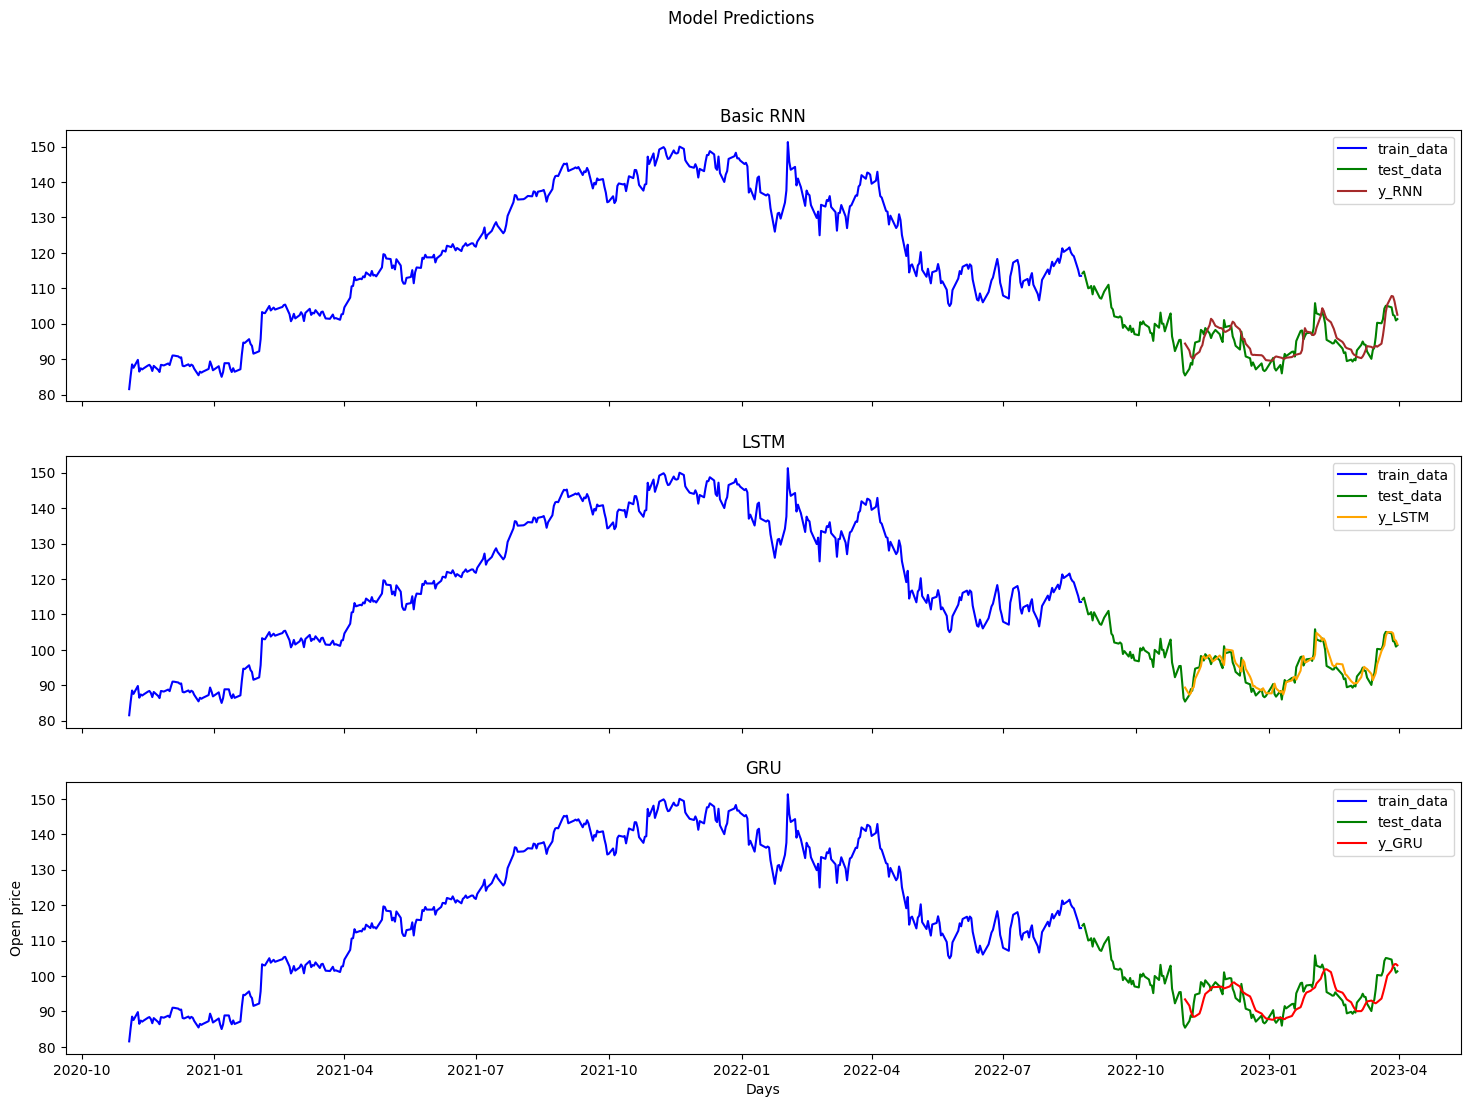

In [ ]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
